##**Definição do problema**

<div align='justify'><p>Pretende-se desenvolver um modelo de Classificação de Texto e Análise de Sentimentos utilizando uma base de dados com 3000 reviews de clientes da Amazon sobre os produtos da Alexa. Com isso, desejamos obter insights sobre as análises dos clientes e descobrir as opiniões positivas e negativas dos produtos. </p></div>

##**Resolução**


###**Etapa 1 - Importação das bibliotecas**

In [ ]:
# Verificação da versão do TensorFlow e importação das bibliotecas necessárias para manipulação dos dados
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.2.0'

###**Etapa 2 - Importação da base de dados**

In [ ]:
# Importação da base de dados
df_alexa = pd.read_csv('amazon-alexa.tsv', sep = '\t')

In [ ]:
# Visualizar os 5 primeiros registros
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
# Verificar os nomes das colunas
df_alexa.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

**Features**

* **rate:** Nota que a pessoa avaliou o produto;
* **date:** Data da avaliação;
* **variation:** Tipo do produto;
* **verified_reviews:** Texto da review do produto;
* **feedback:** 1 para avaliação positiva e 0 para avaliação negativa.

In [ ]:
# Visualizar a coluna 'verified_reviews'
df_alexa['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

###**Etapa 3: Visualização dos dados**

In [ ]:
# Filtro para selecionar apenas as avaliações positivas
positive = df_alexa[df_alexa['feedback'] == 1]

In [ ]:
# Visualizar a variável positive
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
# Filtro para selecionar apenas as avaliações negativas
negative = df_alexa[df_alexa['feedback'] == 0]

In [ ]:
# Visualizar a variável negativa
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


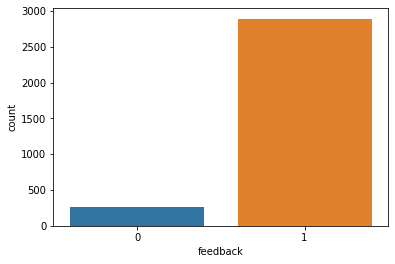

In [ ]:
# Visualizar a contagem de avaliações positivas e negativas
sns.countplot(df_alexa['feedback'], label = 'Count');

Podemos ver que possuímos uma base de dados bem desbalanceada.

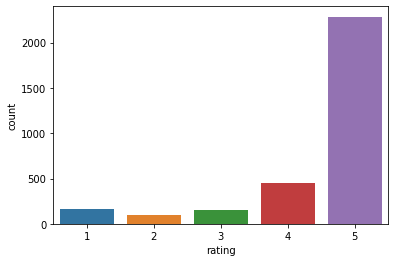

In [ ]:
# Visualizar a contagem de notas de avaliação dos produtos
sns.countplot(x = 'rating', data = df_alexa);

Podemos observar que a nota 5 ocorre com mais frequência, ou seja, possuímos mais avaliações positivas.

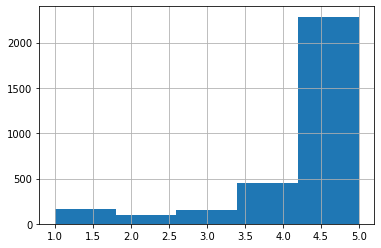

In [ ]:
# Visualizar a contagem de notas de avaliação dos produtos por meio de um histograma
df_alexa['rating'].hist(bins = 5);

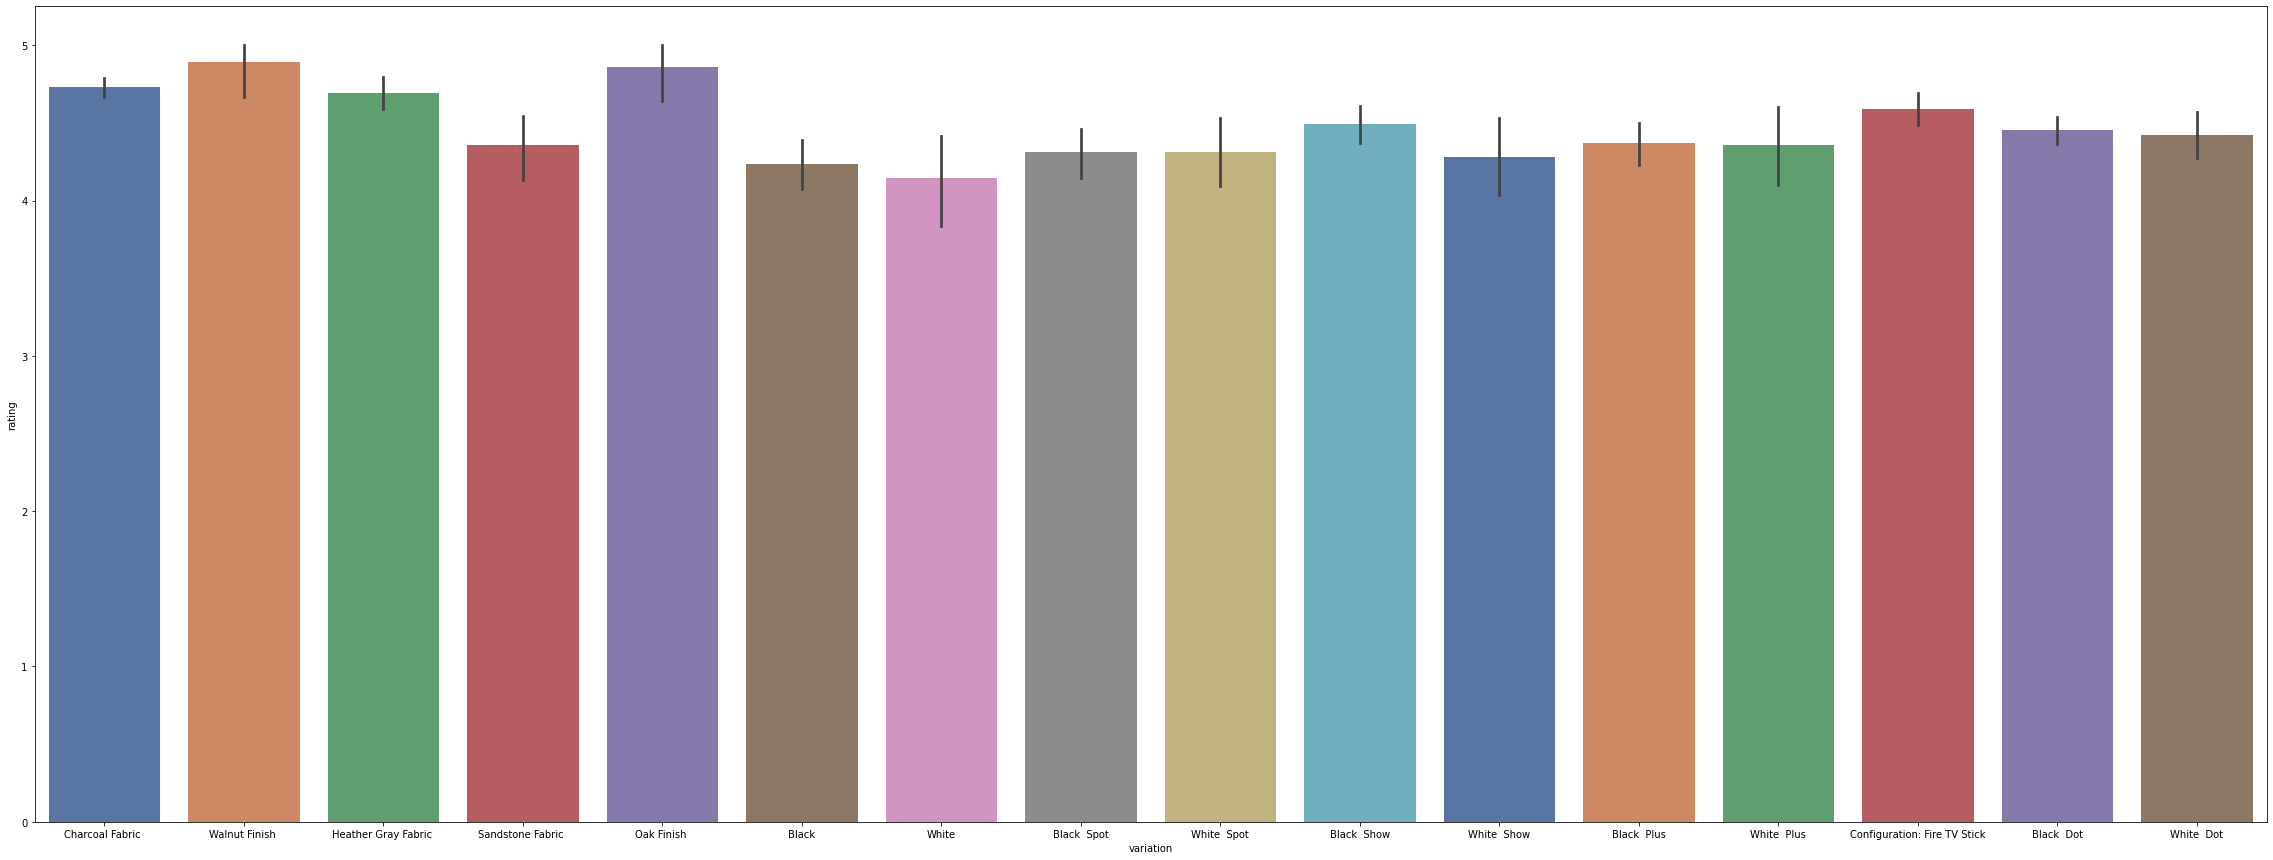

In [ ]:
# Verificar a contagem das notas por tipo de produto
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y = 'rating', data = df_alexa, palette = 'deep');

###**Etapa 4 - Limpeza dos dados** 

In [ ]:
# Deletar as colunas 'date' e 'rating
df_alexa = df_alexa.drop(['date', 'rating'], axis = 1)

In [ ]:
# Visualizar os 5 primeiros registrosde df_alexa
df_alexa.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [ ]:
# Criar variáveis do tipo dummies para as categorias da coluna 'variation'
variation_dummies = pd.get_dummies(df_alexa['variation'])

In [ ]:
# Visualizar a variável variation_dummies
variation_dummies

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Deletar a coluna 'variation'
df_alexa.drop(['variation'], axis = 1, inplace=True)

In [ ]:
# Visualizar os 5 primeiros registros de df_alexa
df_alexa.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [ ]:
# União dos DataFrames df_alexa e variation-dummies
df_alexa = pd.concat([df_alexa, variation_dummies], axis = 1)

In [ ]:
# Visualizar os 5 primeiros registros de df_alexa
df_alexa.head()

,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


####**Exemplo de tokenização**


In [ ]:
# Importamos CountVectorizer para realizarmos a tokenização
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Criamos uma variável 'sample_data' para armazernamos uma lista de textos
sample_data = ['This is the first document.',
               'This document is the second document.',
               'And this is the third one.',
               'Is this the first document?']

In [ ]:
# Criar um objeto da classe CountVectorizer e executamos fit_transform
# Atribuir o resultado para a variável X
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [ ]:
# Visualizar as palavras únicas dos textos
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [ ]:
# Visualizar a variável X no formato de array
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


####**Tokenização da base de dados**

In [ ]:
# Criar um objeto da classe CountVectorizer e executamos fit_transform
# Atribuir o resultado para a variável alexa_countvectorizer
alexa_countvectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])

In [ ]:
# Verificar o formato da variável alexa_countvectorizer
alexa_countvectorizer.shape

(3150, 4044)

Note que temos 3150 registros e 4044 colunas, ou seja, nessa base de dados temos 4044 caracteres únicos.

In [ ]:
# Verificar tipo de dado da variável alexa_countvectorizer
type(alexa_countvectorizer)

scipy.sparse.csr.csr_matrix

In [ ]:
# Visualizar os caracteres únicos da base de dados
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [ ]:
# Visualizar a variável alexa_countvectorizer no formato de array
print(alexa_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Deletar a coluna 'verified_reviews'
df_alexa.drop(['verified_reviews'], axis = 1, inplace=True)

In [ ]:
# Visualizar os 5 primeiros registros de df_alexa
df_alexa.head()

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Transformar a variável alexa_countvectorizer em um DataFramee e armazenar em uma variável reviews
reviews = pd.DataFrame(alexa_countvectorizer.toarray())

In [ ]:
# Visualizar os 5 primeiros registros de reviews
reviews.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# União de DataFrames df_alexa e reviews
df_alexa = pd.concat([df_alexa, reviews], axis = 1)

In [ ]:
# Visualizar os 5 primeiros registros de df_alexa
df_alexa.head()

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Atribuir a variável X todas as features previsoras
X = df_alexa.drop(['feedback'], axis = 1)

In [ ]:
# Visualizar a variável X
X

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Atribuir a variável y a feature que desejamos prever
y = df_alexa['feedback']

In [ ]:
# Visualizar a variável y
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [ ]:
# Divisão da base de dados em treinamento e teste. Sendo 80% para treinamento e 20% para teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
# Verificar o formato de X_train
X_train.shape

(2520, 4060)

Temos 2520 registros para treinamento.

In [ ]:
# Verificar o formato de X_teste
X_test.shape

(630, 4060)

Temos 630 registros para teste.

###**Etapa 5 - Construção e treinamento do modelo**

In [ ]:
# Criação da rede neural artificial

# Criação de um modelo sequencial de camadas
classifier = tf.keras.models.Sequential()

# Aplicação de 400 camadas ocultas, função de ativação ReLu e 4060 valores de entrada.
classifier.add(tf.keras.layers.Dense(units = 400, activation='relu', input_shape=(4060,)))

# Aplicação de 400 camadas ocultas e a função de ativação ReLu.
classifier.add(tf.keras.layers.Dense(units = 400, activation='relu'))

# Aplicação de 1 valor de saída e a função de ativação Sigmoid.
classifier.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

# 4060 -> 400 -> 400 -> 1

In [ ]:
# Visualizar sumário da RNA criada
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               1624400   
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 1,785,201
Trainable params: 1,785,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilação do modelo com o algoritmo de otimização Adam (Gradiente Descendente Estocástico), função de custo Binary Cross Entropy e definimos metrics como accuracy
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Treinamento da RNA

# Armazenamos o histórico das epócas em uma variável epochs_hist;
# Atribuimos 10 epócas para o treinamento do modelo;

epochs_hist = classifier.fit(X_train, y_train, epochs=10)

Epoch 1/10
79/79 [==============================] - 1s 13ms/step - loss: 0.2719 - accuracy: 0.9155
Epoch 2/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0799 - accuracy: 0.9694
Epoch 3/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0544 - accuracy: 0.9869
Epoch 4/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0243 - accuracy: 0.9937
Epoch 5/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0169 - accuracy: 0.9940
Epoch 6/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0166 - accuracy: 0.9940
Epoch 7/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0158 - accuracy: 0.9937
Epoch 8/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0164 - accuracy: 0.9937
Epoch 9/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0147 - accuracy: 0.9944
Epoch 10/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0146 - accuracy: 0.9948


###**Etapa 6: Avaliação do modelo** 

In [ ]:
# Importação das métricas de avaliação e a matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Executamos as previsões para a base de dados de treinamento e armazenamos na variável y_pred_train
y_pred_train = classifier.predict(X_train)
y_pred_train

array([[1.        ],
       [0.9999982 ],
       [1.        ],
       ...,
       [1.        ],
       [0.999687  ],
       [0.99999416]], dtype=float32)

In [ ]:
# Definir os valores maiores que 0.5 como verdadeiros e os demais como falso
y_pred_train = (y_pred_train > 0.5)
y_pred_train

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
# Visualizar a matriz de confusão das previsões realizadas com a base de dados de treinamento
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[ 186,   12],
       [   1, 2321]])

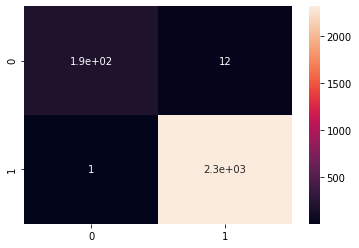

In [ ]:
# Visualizar o heatmap da matriz das previsões realizadas com a base de dados de treinamento
sns.heatmap(cm, annot=True);

In [ ]:
# Executamos as previsões para a base de dados de teste e armazenamos na variável y_pred_test
y_pred_test = classifier.predict(X_test)

# Definir os valores maiores que 0.5 como verdadeiros e os demais como falsos
y_pred_test = (y_pred_test > 0.5)

# Visualizar a matriz de confusão das previsões realizadas com a base de dados de teste
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[ 24,  35],
       [ 10, 561]])

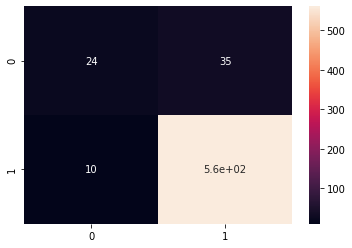

In [ ]:
# Visualizar o heatmap da matriz das confusão das previsões realizadas com a base de dados de teste
sns.heatmap(cm, annot=True);

In [ ]:
# Visualizar o dicionário de epochs_hist
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

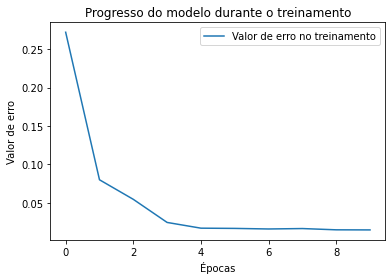

In [ ]:
# Visualizar o valor de erro na base de dados de treinamento
plt.plot(epochs_hist.history['loss'])
plt.title('Progresso do modelo durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Valor de erro')
plt.legend(['Valor de erro no treinamento']);

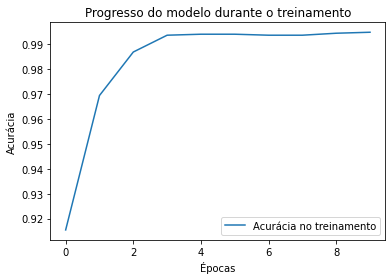

In [ ]:
# Visualizar acurácia na base de dados de treinamento
plt.plot(epochs_hist.history['accuracy'])
plt.title('Progresso do modelo durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Acurácia no treinamento']);